# Un premier classificateur k-NN 

1) On se propose de classifier les iris suivant leurs deux premières caractéristiques (longueur et largeur des sépales)...

In [1]:
import sklearn
from sklearn import datasets
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
# On importe les données
iris = datasets.load_iris()
key = iris.keys()
X = iris.data[:, :2]  # On ne tient compte que des 2 premières caractéristiques
Y = iris.target

print(key)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


<IPython.core.display.Javascript object>


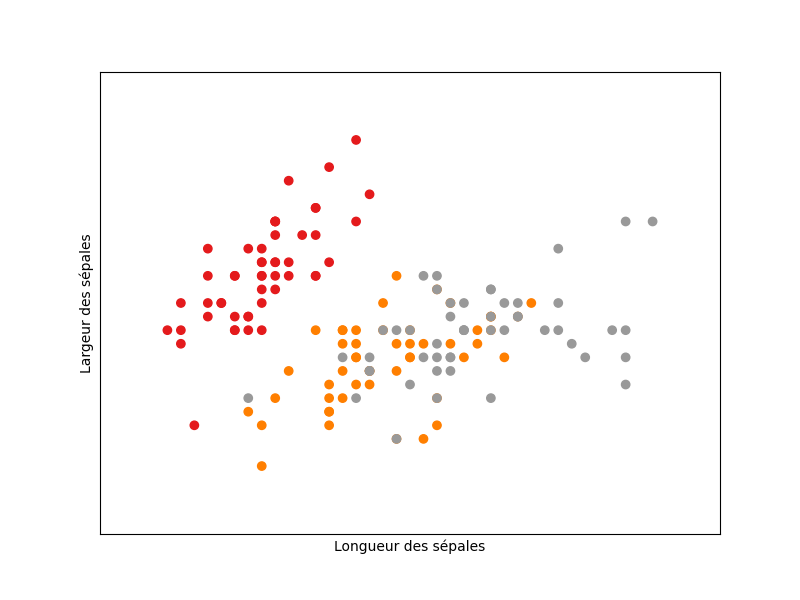

([], [])

In [4]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
plt.figure(0, figsize=(8, 6))
plt.clf()
plt.scatter(X[:, 0], X[:, 1],c=Y,cmap=plt.cm.Set1)
plt.xlabel('Longueur des sépales')
plt.ylabel('Largeur des sépales')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())


2) On commence par utiliser les fonctions prédéfinies de scikit-learn : 

In [14]:
# à l'aide de KNeighborsClassifier
# définir un classificateur k-NN avec k=1
from sklearn.neighbors import KNeighborsClassifier as knc
knn = knc(n_neighbors = 1)

print(X,Y)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [6]:
# à l'aide de train_test_split,
# partager les données en un jeu d'apprentissage et un jeu de test
from sklearn.model_selection import train_test_split as ttc
Xa, Xt, Ya, Yt = ttc(X, Y, random_state=0)

In [7]:
# à l'aide de fit, associer le jeu de données d'apprentissage à votre knn
knn.fit(Xa, Ya)

#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

KNeighborsClassifier(n_neighbors=1)

In [8]:
# Tester votre classificateur knn sur les données de test à l'aide de predict
# et comparer les résultats obtenus avec les vraies valeurs
prediction = knn.predict(Xt)
print(prediction)

[1 2 0 2 0 1 0 1 2 1 2 2 1 2 1 0 2 1 0 0 1 1 0 0 2 0 0 2 1 0 2 1 0 1 2 1 0
 1]


In [9]:
#Quel est le score de prédiction de votre knn? 
score = knn.score(Xt,Yt, sample_weight = None)
print(score)

0.7368421052631579


In [10]:
# Même question en utilisant 3 plus proches voisins

knn = knc(n_neighbors = 3)
knn.fit(Xa, Ya)
score = knn.score(Xt,Yt, sample_weight = None)
prediction = knn.predict(Xt)
print(prediction)
print(score)



[1 1 0 2 0 2 0 2 2 2 2 2 2 2 2 0 2 1 0 0 1 1 0 0 2 0 0 2 1 0 2 1 0 2 2 0 0
 1]
0.6842105263157895


In [11]:
# Effectuer une validation croisée à 5 répétitions, soit à la main, 
# soitl'aide de cross_val_score

from sklearn.model_selection import cross_val_score as cvs
print(cvs(knn, X, Y, cv = 5))


[0.66666667 0.76666667 0.66666667 0.86666667 0.66666667]


<IPython.core.display.Javascript object>


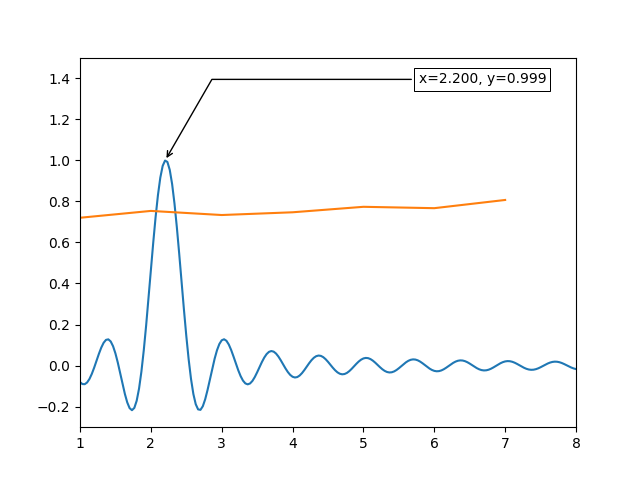

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2,8, num=301)
y = np.sinc((x-2.21)*3)


fig, ax = plt.subplots()
ax.plot(x,y)

def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x,y)


ax.set_ylim(-0.3,1.5)
plt.show()

In [13]:
#construction à la main, sur un jeu de données différent avec un nouveau split à chaque ronde

import numpy

evolution = []


nb_voisin = 9
for k in range(1,nb_voisin):
    knn = knc(n_neighbors = k)
    ligne = cvs(knn, X,Y, cv=50)
    
    evolution.append(numpy.mean(ligne))

plt.xlim(1, nb_voisin-1)
plt.plot(evolution)
plt.show()
ymax = max(evolution)
print(ymax)

0.8066666666666665


3) Essayons Maintenant de programmer nous-même notre classificateur k-NN :

In [ ]:
# définir une fonction de distance dans R^2


In [ ]:
# Ecrire la fonction indiceKNN calculant les indices des k plus proches 
# voisins de x dans la liste Y
# on pourra utiliser la fonction argsort de numpy


In [ ]:
# Quels sont les indices des 5 plus proches voisins 
# de la première donnée de test?


In [ ]:
# utiliser les fonctions  value_counts et idxmax de pandas 
# pour en déduire la valeur à associer à Xt[0] pour k=5


In [ ]:
# Regrouper toutes les fonctions précédentes en une fonction predict(x,Xa,Ya,k)
# Donnant la prédiction de la valeur de x après apprentissage d'un k-NN
# sur les données d'apprentissages données en paramètre


In [ ]:
# Ecrire une fonction compare(Xa,Ya,Xt,Yt,k) calculant le score de votre knn
# à l'aide des données de test fournies
